In [1]:
import pandas as pd
import seaborn as sns # for making statistical graph / bar graph
import matplotlib.pyplot as plt
import numpy as np 
import sklearn as skl # provides supervised & unsupervised algorithms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
#Exclude header to avoid issues
#index_col = "insulin"
column_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
# loading the dataset
dataset = pd.read_csv("diabetes.csv",header = None, names=column_names, skiprows=(0,0))

In [3]:
dataset.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
dataset.info() # exploratory data analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataset.describe() 

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#conversion of String into numeric
convert_col = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
for col in convert_col: 
    dataset[col] = pd.to_numeric(dataset[col])

In [7]:
# feature selection
features_column = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
x = dataset[features_column] # x-axis (independant variable)
y = dataset.label # dependant variable

Text(0.5, 249.0, 'Feature values on X axis')

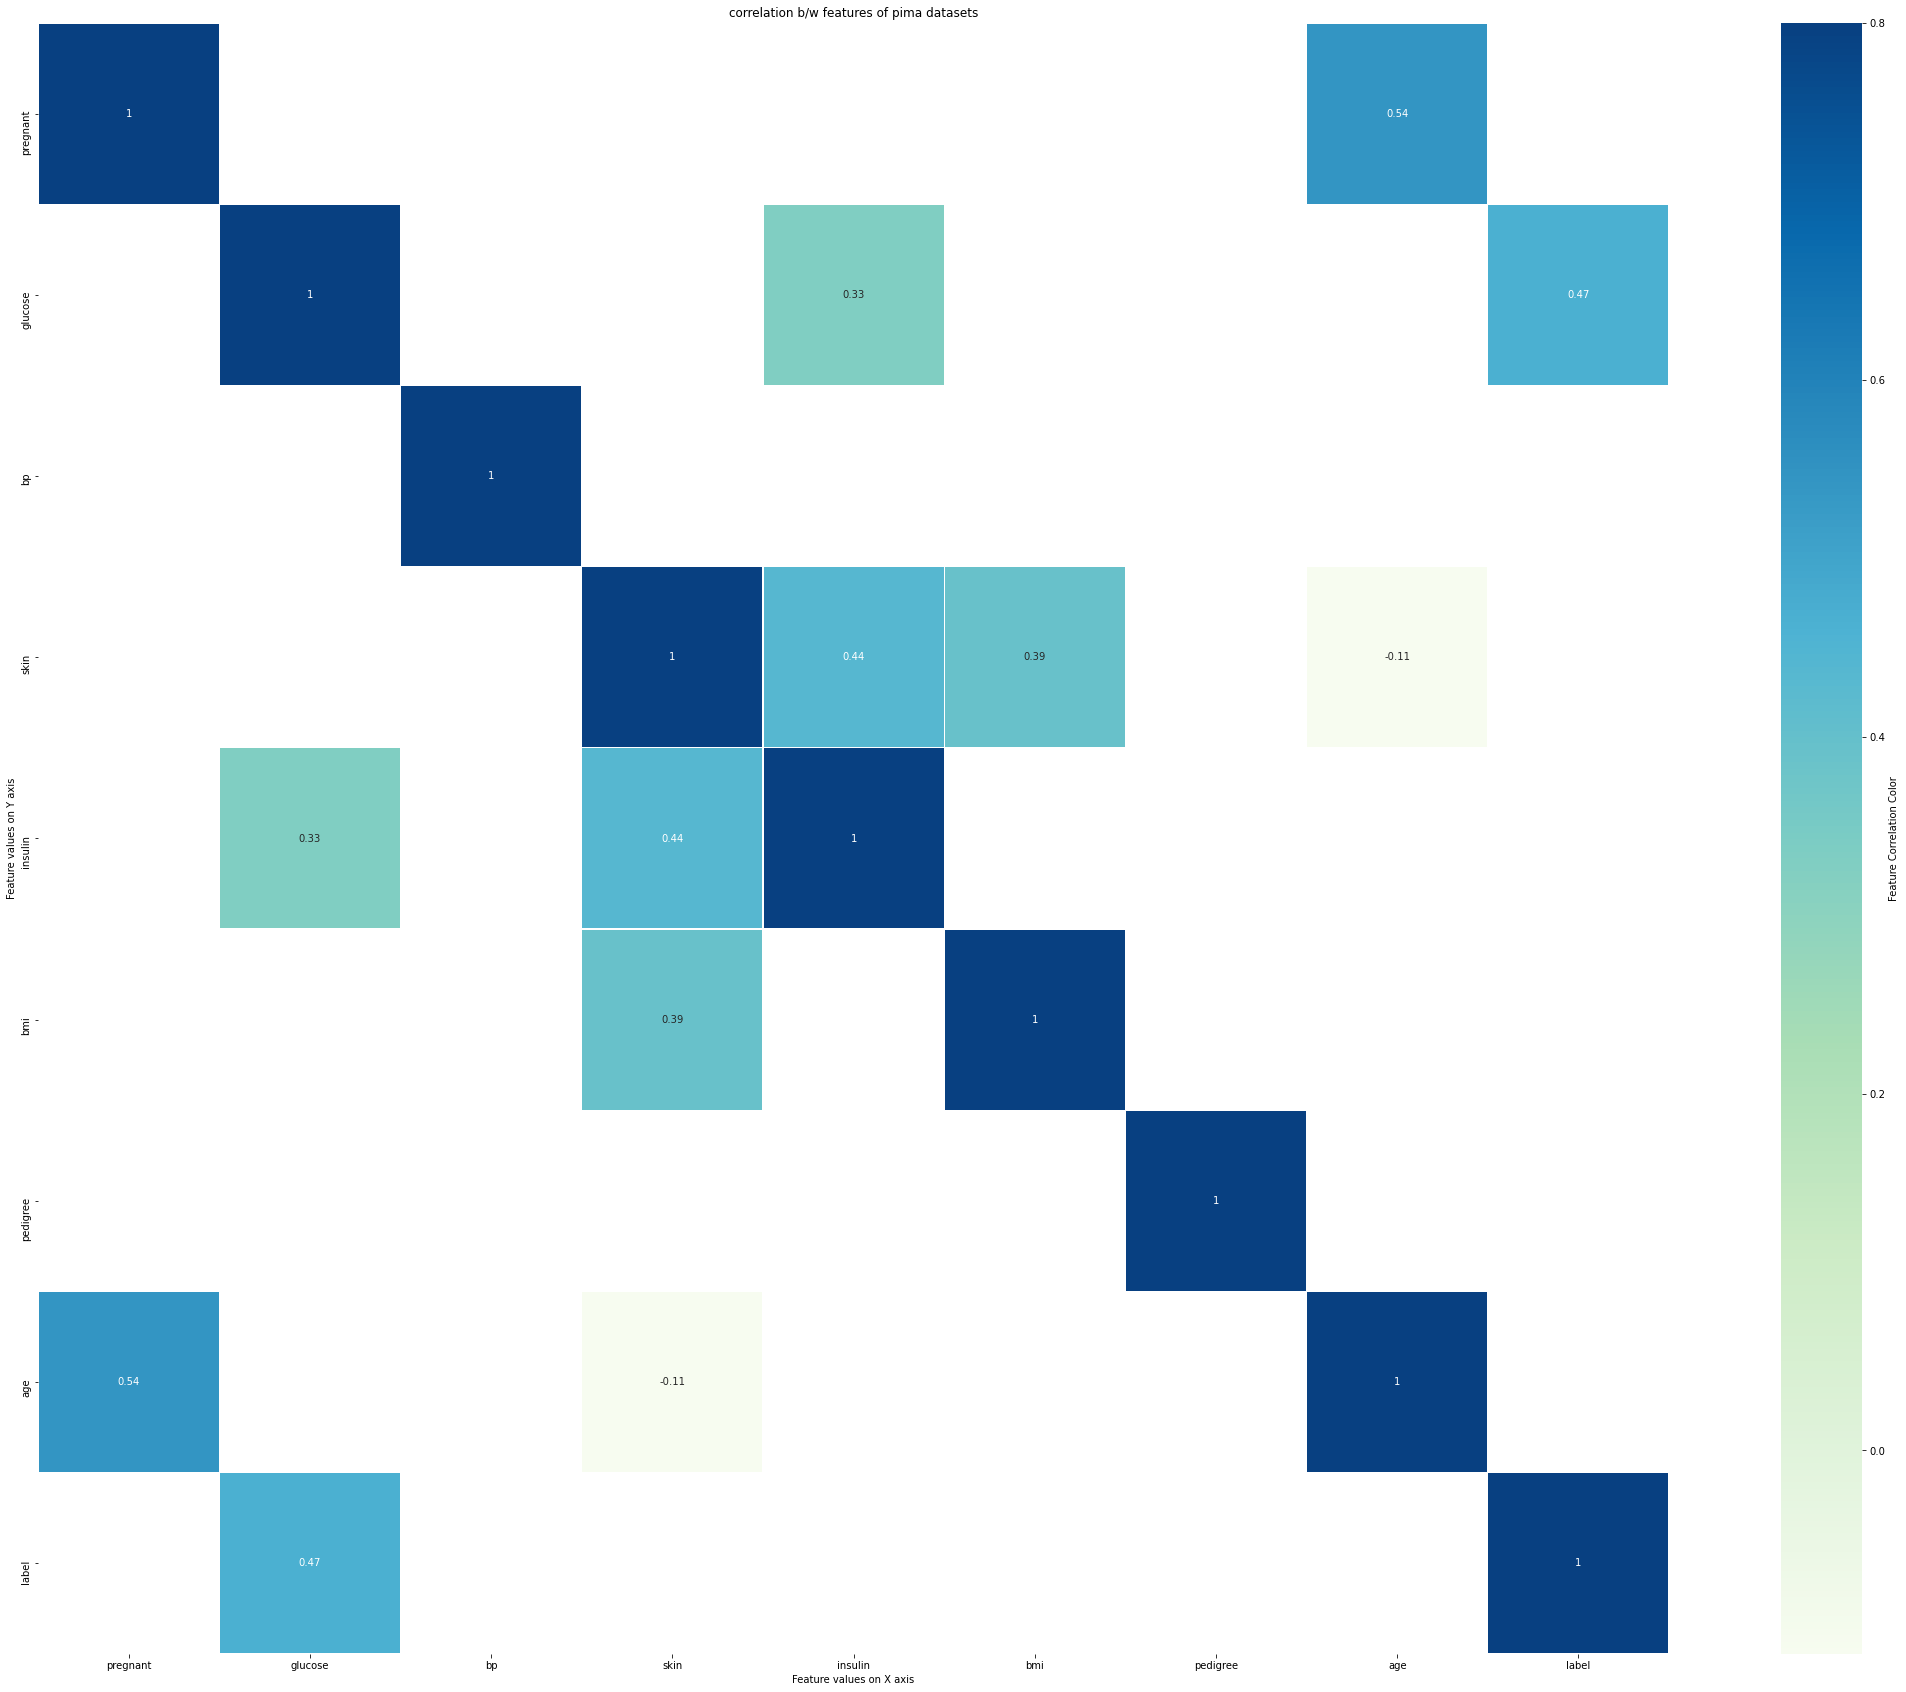

In [8]:
#checking correlation and correlation plot
corr = dataset.corr()
plt.figure(figsize=(40,30))

corr_range = corr[(corr >= 0.3) | (corr <= -0.1)]
#visualize the corrlation between the data
sns.heatmap(corr_range, 
            vmax = .8,
            linewidths = 0.01, 
            square = True,
            annot = True, 
            cmap = 'GnBu',
            linecolor="white",
            cbar_kws={'label':'Feature Correlation Color'}
           )

plt.title("correlation b/w features of pima datasets")
plt.ylabel("Feature values on Y axis")
plt.xlabel("Feature values on X axis")
# negative correlation means relationship b/w 2 variables such that value of one increases and other decreases

In [9]:
#splitting the dataset
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [10]:
#Applying Logistic Regression algorithm
logistic_function = LogisticRegression()

In [11]:
#fit the model with training data
logistic_function.fit(x_train,y_train)
y_prediction = logistic_function.predict(x_test)

F:\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
#model evaluation using confusin matrix for the performance of classification model
from sklearn import metrics
cnf_matrix_evaluation = metrics.confusion_matrix(y_test,y_prediction)
cnf_matrix_evaluation

array([[79, 20],
       [19, 36]], dtype=int64)

In [13]:
# visualization of confusion matrix using heatmap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

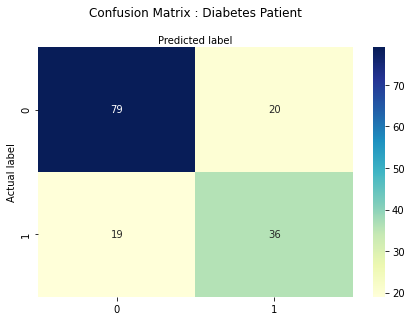

In [14]:
class_names = [0,1] 
fig ,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names) 

# creating the heatmap for getting the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation),annot = True,cmap="YlGnBu",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix : Diabetes Patient', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [15]:
#confusion matrix conclusion for the evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_prediction))
print("Precision:",metrics.precision_score(y_test,y_prediction))
print("Recall:",metrics.recall_score(y_test,y_prediction))
print(metrics.accuracy_score(y_test,y_prediction)*100, "% :", "chances that person having diabetes")

print(y_prediction)

Accuracy: 0.7467532467532467
Precision: 0.6428571428571429
Recall: 0.6545454545454545
74.67532467532467 % : chances that person having diabetes
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


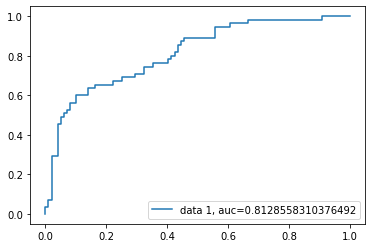

In [16]:
#performance evaluation using the ROC curve , Receiver Operating Characteristic curve is plot of true positive
# it shows trade off b/w sensitivity and specificity

y_prediction_probability = logistic_function.predict_proba(x_test)[::,1]
fpr , tpr , _ = metrics.roc_curve(y_test,y_prediction_probability)
auc = metrics.roc_auc_score(y_test,y_prediction_probability)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [17]:
from sklearn.metrics import f1_score
f1_score(y_test,y_prediction,average=None)

array([0.80203046, 0.64864865])